# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(f"df_hh_income dataframe shape: {df_hh_income.shape} ({df_hh_income.shape[1]} columns and {df_hh_income.shape[0]} rows).")
print(f"df_hh_income dataframee columns names: {df_hh_income.columns.tolist()}.")
df_hh_income.sample(5)

df_hh_income dataframe shape: (29322, 3) (3 columns and 29322 rows).
df_hh_income dataframee columns names: ['Geographic Area', 'City', 'Median Income'].


,Geographic Area,City,Median Income
25148,TX,Haskell city,36897
24863,TX,Crockett city,23106
24441,TN,Scotts Hill town,25125
24402,TN,Philadelphia city,32788
24602,TX,Ballinger city,34817
5952,ID,Malta city,44792
1560,AR,Fouke city,28571
15385,NE,Merriman village,(X)
27132,VA,Parrott CDP,14405
16107,NJ,Leisure Village East CDP,37976


In [47]:
print(f"df_pct_poverty dataframe shape: {df_pct_poverty.shape} ({df_pct_poverty.shape[1]} columns and {df_pct_poverty.shape[0]} rows).")
print(f"df_pct_poverty dataframee columns names: {df_pct_poverty.columns.tolist()}.")
df_pct_poverty.sample(5)

df_pct_poverty dataframe shape: (29329, 3) (3 columns and 29329 rows).
df_pct_poverty dataframee columns names: ['Geographic Area', 'City', 'poverty_rate'].


,Geographic Area,City,poverty_rate
16176,NJ,Netcong borough,12.1
9287,KS,Ellis city,7.6
11699,MI,Alba CDP,8.9
607,AK,Atqasuk city,23.3
24099,SD,Yankton city,16.9
22808,PA,Reynolds Heights CDP,33.4
987,AZ,Campo Bonito CDP,0
18470,NC,Minnesott Beach town,6
16610,NM,Los Cerrillos CDP,6.7
2016,CA,Beale AFB CDP,12.5


In [20]:
print(f"df_pct_completed_hs dataframe shape: {df_pct_completed_hs.shape} ({df_pct_completed_hs.shape[1]} columns and {df_pct_completed_hs.shape[0]} rows).")
print(f"df_pct_completed_hs dataframee columns names: {df_pct_completed_hs.columns.tolist()}.")
df_pct_completed_hs.sample(5)

df_pct_completed_hs dataframe shape: (29329, 3) (3 columns and 29329 rows).
df_pct_completed_hs dataframee columns names: ['Geographic Area', 'City', 'percent_completed_hs'].


,Geographic Area,City,percent_completed_hs
20748,OK,Ketchum town,85.4
16148,NJ,Merchantville borough,88.2
3175,CA,Sea Ranch CDP,98.3
2444,CA,Gardena city,81.8
19799,OH,Malinta village,90.2
10969,MD,Betterton town,96.2
24651,TX,Beverly Hills city,69.9
22085,PA,Georgetown borough,87.9
3960,CT,Higganum CDP,94.1
9231,KS,Coffeyville city,83.4


In [7]:
print(f"df_share_race_city dataframe shape: {df_share_race_city.shape} ({df_share_race_city.shape[1]} columns and {df_share_race_city.shape[0]} rows).")
print(f"df_share_race_city dataframee columns names: {df_share_race_city.columns.tolist()}.")
df_share_race_city.sample(5)

df_share_race_city dataframe shape: (29268, 7) (7 columns and 29268 rows).
df_share_race_city dataframee columns names: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'].


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
15209,NE,Ewing village,99.5,0,0,0,0
10013,KY,Hollow Creek city,92.7,5.1,0.6,1,0.8
28332,WI,Balsam Lake village,94.2,0.9,2.6,0.3,0.7
11125,MD,Glassmanor CDP,4.1,89.2,0.2,0.8,7.5
27108,VA,Pulaski town,89,7.8,0.3,0.6,1.9
19783,OH,Martins Ferry city,91.6,5.6,0.3,0.1,0.7
16415,NM,Bosque Farms village,83.9,0.4,2.8,0.6,37.5
17865,NY,Thousand Island Park CDP,100,0,0,0,0
1987,CA,Auberry CDP,86.4,0.4,4.4,1,13
16632,NM,Napi Headquarters CDP,0.6,0,97,0,2.6


In [8]:
print(f"df_fatalities dataframe shape: {df_fatalities.shape} ({df_fatalities.shape[1]} columns and {df_fatalities.shape[0]} rows).")
print(f"df_fatalities dataframee columns names: {df_fatalities.columns.tolist()}.")
df_fatalities.sample(5)

df_fatalities dataframe shape: (2535, 14) (14 columns and 2535 rows).
df_fatalities dataframee columns names: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera'].


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2373,2632,Charles Edgar Mullins,05/06/17,shot,gun,45.00,M,W,Bardstown,KY,False,attack,Car,False
1297,1481,Jackie Lee Kirkham,20/04/16,shot,undetermined,52.00,M,W,Perryville,AR,False,other,Not fleeing,False
1378,1565,Derek Prophet,25/05/16,shot,knife,43.00,M,W,Oklahoma City,OK,True,other,Not fleeing,False
1031,1174,Joshua Tate Fielding,17/01/16,shot and Tasered,gun,38.00,M,W,Rainbow City,AL,False,other,Not fleeing,False
707,839,Lawrence Price,17/09/15,shot,gun,NaN,M,W,Brodhead,KY,False,attack,Not fleeing,False
1862,2142,Carlos Valencia,25/11/16,shot,unarmed,26.00,M,H,Tucson,AZ,False,other,Not fleeing,True
1516,1706,Orville Edwards,11/07/16,shot,gun,39.00,M,B,New York,NY,False,attack,Foot,False
2466,2749,Carroll Tuttle,05/07/17,shot,gun,51.00,M,W,Madison,ME,False,attack,NaN,False
2338,2595,Joseph M. Hodgin,21/05/17,shot,gun,43.00,M,W,Allentown,PA,False,attack,Car,False
1715,1926,Clayton Eugene Baker,30/09/16,shot,NaN,38.00,M,W,Groveton,TX,False,undetermined,Not fleeing,False


In [9]:
print(f'df_hh_income: number of missing values across columns: \n{df_hh_income.isna().sum()}')
print(f'df_pct_poverty: number of missing values across columns: \n{df_pct_poverty.isna().sum()}')
print(f'df_pct_completed_hs: number of missing values across columns: \n{df_pct_completed_hs.isna().sum()}')
print(f'df_share_race_city: number of missing values across columns: \n{df_share_race_city.isna().sum()}')
print(f'df_fatalities: number of missing values across columns: \n{df_fatalities.isna().sum()}')

df_hh_income: number of missing values across columns: 
Geographic Area     0
City                0
Median Income      51
dtype: int64
df_pct_poverty: number of missing values across columns: 
Geographic Area    0
City               0
poverty_rate       0
dtype: int64
df_pct_completed_hs: number of missing values across columns: 
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
df_share_race_city: number of missing values across columns: 
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
df_fatalities: number of missing values across columns: 
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city    

In [10]:
print(f'df_hh_income: number of rows with duplicated data: {df_hh_income.duplicated().sum()}')
print(f'df_pct_poverty: number of rows with duplicated data: {df_pct_poverty.duplicated().sum()}')
print(f'df_pct_completed_hs: number of rows with duplicated data: {df_pct_completed_hs.duplicated().sum()}')
print(f'df_share_race_city: number of rows with duplicated data: {df_share_race_city.duplicated().sum()}')
print(f'df_fatalities: number of rows with duplicated data: {df_fatalities.duplicated().sum()}')

df_hh_income: number of rows with duplicated data: 0
df_pct_poverty: number of rows with duplicated data: 0
df_pct_completed_hs: number of rows with duplicated data: 0
df_share_race_city: number of rows with duplicated data: 0
df_fatalities: number of rows with duplicated data: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [13]:
print(f"NaN values in df_hh_income will be filled with 0.")
df_hh_income = df_hh_income.fillna(0)

NaN values in df_hh_income will be filled with 0.


In [14]:
rows_with_nan = df_fatalities.isnull().any(axis=1)
percentage = (rows_with_nan.sum() / len(df_fatalities)) * 100
print(f"Percentage of rows with NaN values in df_fatalities: {percentage:.2f}%")
print(f"Due to low percentage of rows with NaN values in df_fatalities those rows will be excluded from further consideration.")
df_fatalities.dropna(inplace=True)

Percentage of rows with NaN values in df_fatalities: 11.08%
Due to low percentage of rows with NaN values in df_fatalities those rows will be excluded from further consideration.


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [76]:
df_pct_poverty['poverty_rate'].replace('-', np.nan, regex=True, inplace=True)
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(float)
states_poverty_rate_states = df_pct_poverty.groupby('Geographic Area').agg({'poverty_rate': pd.Series.mean})

,poverty_rate
Geographic Area,
AK,19.85
AL,20.65
AR,22.96
AZ,25.67
CA,17.12
CO,13.36
CT,9.14
DC,18.00
DE,12.56


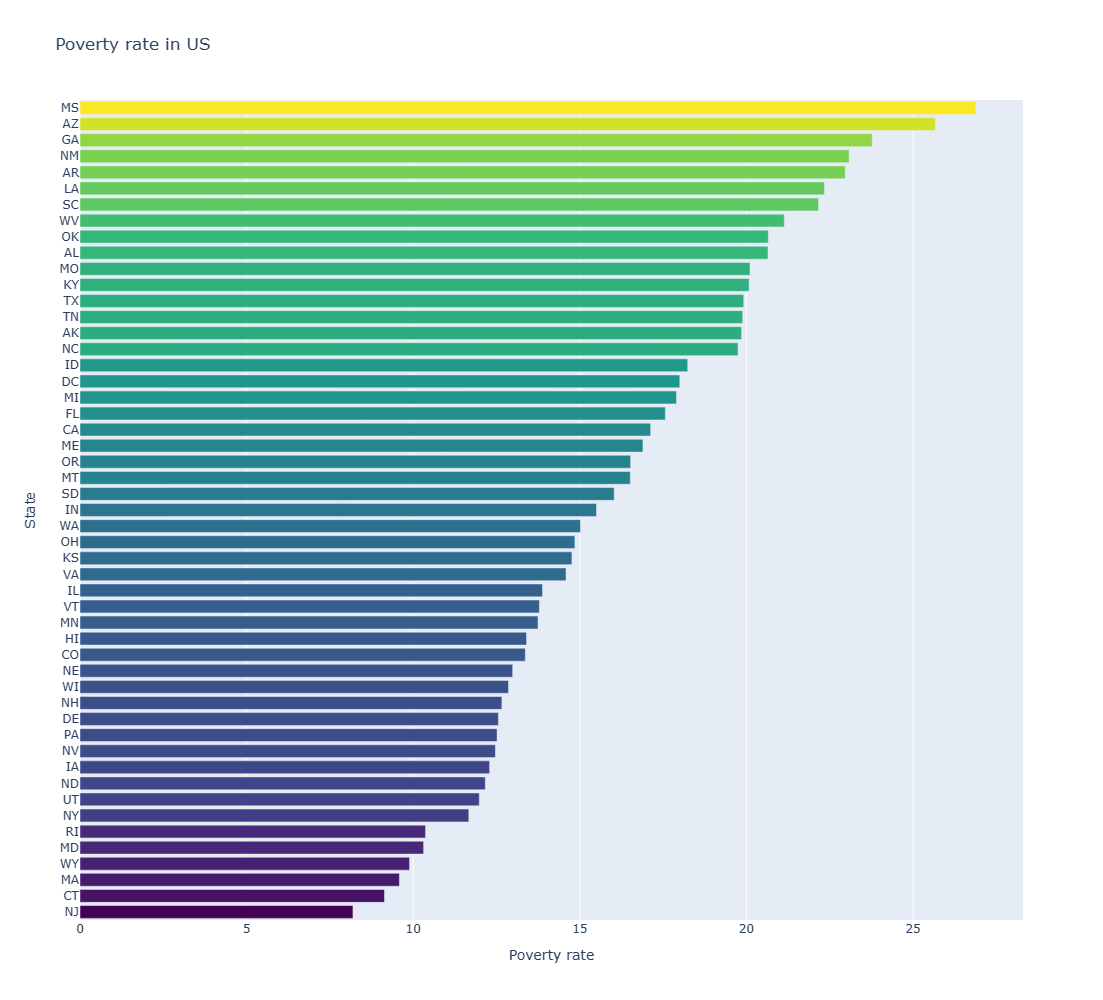

In [81]:
states_poverty_rate_states.sort_values(by='poverty_rate', inplace=True)
h_bar_org = px.bar(
    states_poverty_rate_states, 
    x=states_poverty_rate_states['poverty_rate'], 
    y=states_poverty_rate_states.index, 
    orientation='h', 
    height=1000,
    color=states_poverty_rate_states['poverty_rate'],
    color_continuous_scale='Viridis',
    title='Poverty rate in US')

h_bar_org.update_layout(xaxis_title='Poverty rate', 
                    yaxis_title='State',
                    coloraxis_showscale=False)

h_bar_org.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

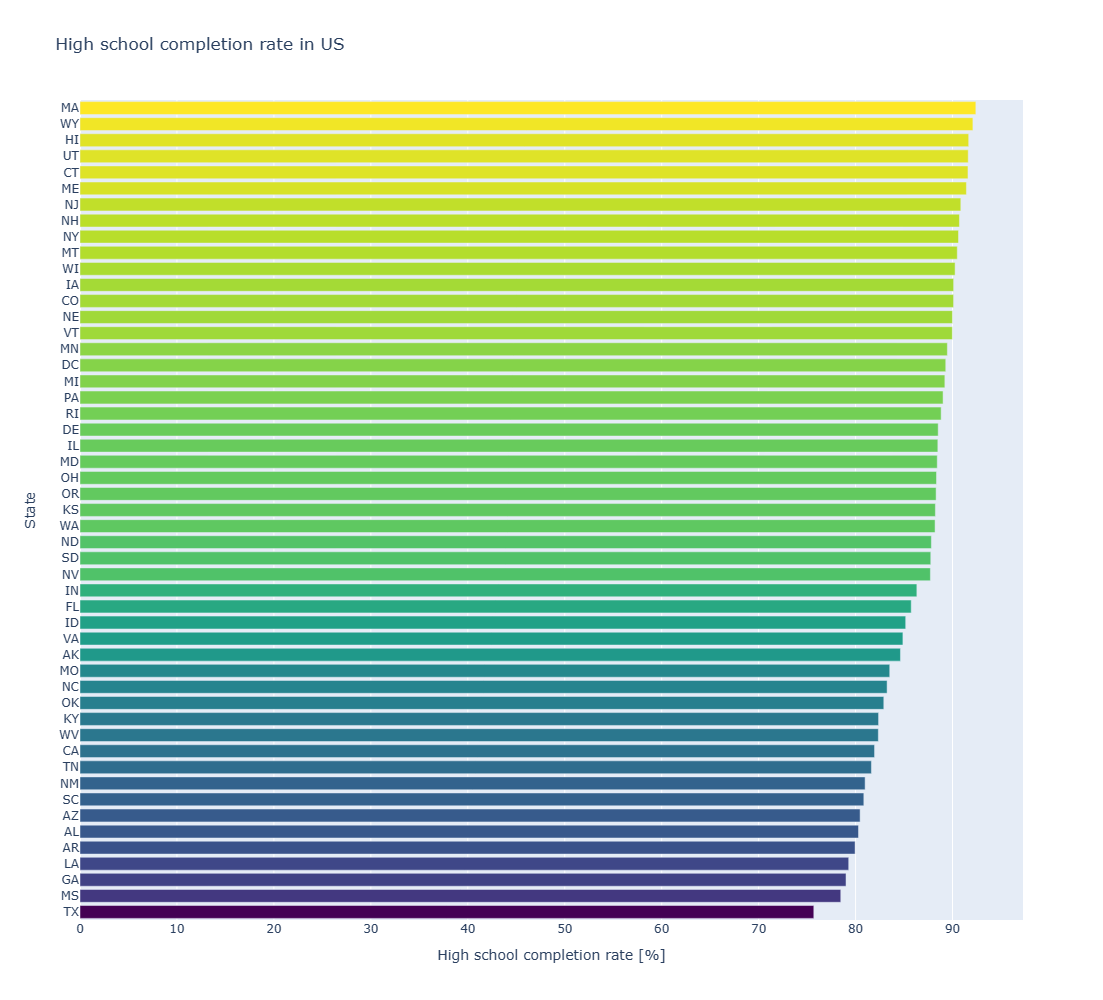

In [83]:
df_pct_completed_hs['percent_completed_hs'].replace('-', np.nan, regex=True, inplace=True)
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(float)
states_hs_commpletion_rate = df_pct_completed_hs.groupby('Geographic Area').agg({'percent_completed_hs': pd.Series.mean})

states_hs_commpletion_rate.sort_values(by='percent_completed_hs', inplace=True)
h_bar_org = px.bar(
    states_hs_commpletion_rate, 
    x=states_hs_commpletion_rate['percent_completed_hs'], 
    y=states_hs_commpletion_rate.index, 
    orientation='h', 
    height=1000,
    color=states_hs_commpletion_rate['percent_completed_hs'],
    color_continuous_scale='Viridis',
    title='High school completion rate in US')

h_bar_org.update_layout(xaxis_title='High school completion rate [%]', 
                    yaxis_title='State',
                    coloraxis_showscale=False)

h_bar_org.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [84]:
states_poverty_v_hs_compl = pd.concat([states_hs_commpletion_rate, states_poverty_rate_states], axis=1)
states_poverty_v_hs_compl

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, NJ to MS
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poverty_rate  51 non-null     float64
dtypes: float64(1)
memory usage: 816.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, TX to MA
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   percent_completed_hs  51 non-null     float64
dtypes: float64(1)
memory usage: 816.0+ bytes


,percent_completed_hs,poverty_rate
Geographic Area,,
TX,75.69,19.92
MS,78.47,26.88
GA,79.01,23.78
LA,79.29,22.34
AR,79.95,22.96
AL,80.30,20.65
AZ,80.47,25.67
SC,80.85,22.16
NM,80.98,23.08


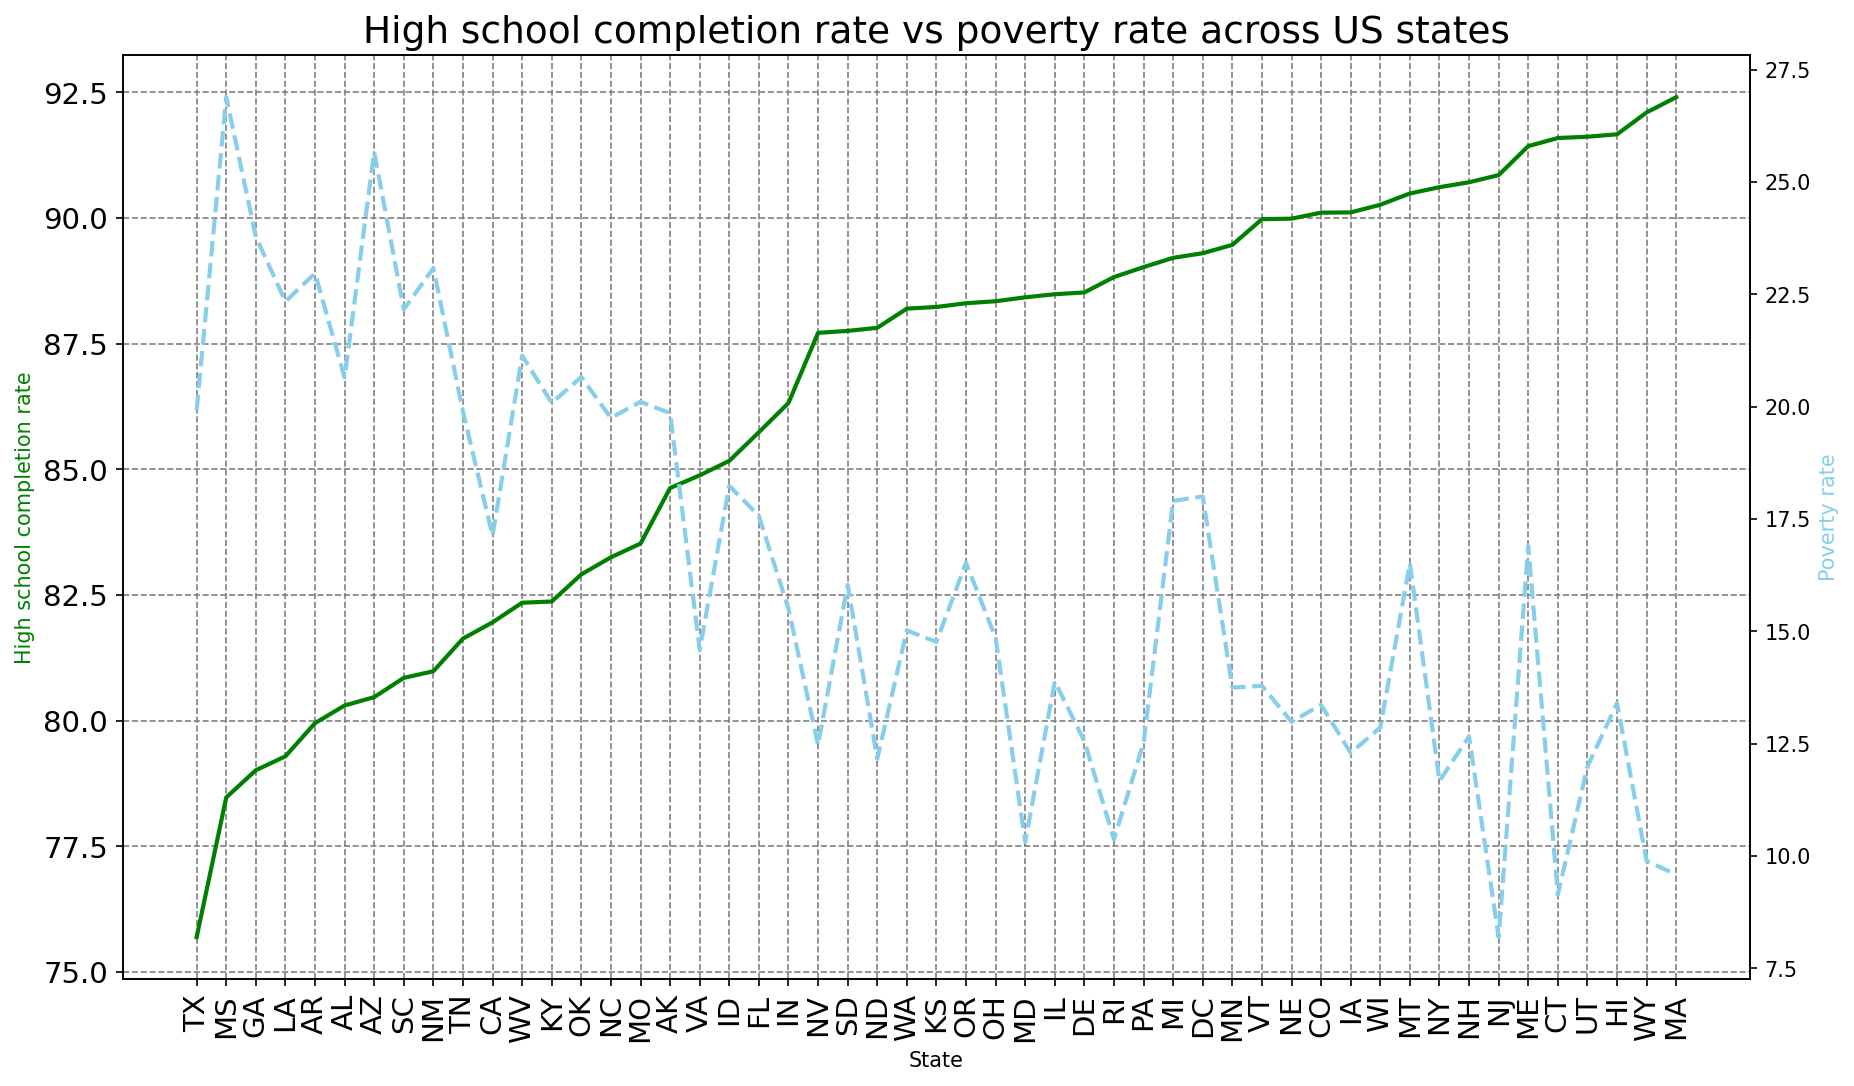

In [91]:
plt.figure(figsize=(14,8), dpi=150)
plt.title('High school completion rate vs poverty rate across US states', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx() 

ax1.plot(states_poverty_v_hs_compl.index, states_poverty_v_hs_compl.percent_completed_hs, color='green', linestyle='-', linewidth=2)
ax2.plot(states_poverty_v_hs_compl.index,states_poverty_v_hs_compl.poverty_rate, color='skyblue', linestyle='--', linewidth=2)

ax1.set_xlabel('State')
ax1.set_ylabel('High school completion rate', color='green')
ax2.set_ylabel('Poverty rate', color='skyblue')

ax1.grid(color='grey', linestyle='--')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

C:\Users\james\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\james\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\james\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning:

The following kwargs were not used by contour: 'marker'

C:\Users\james\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\james\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


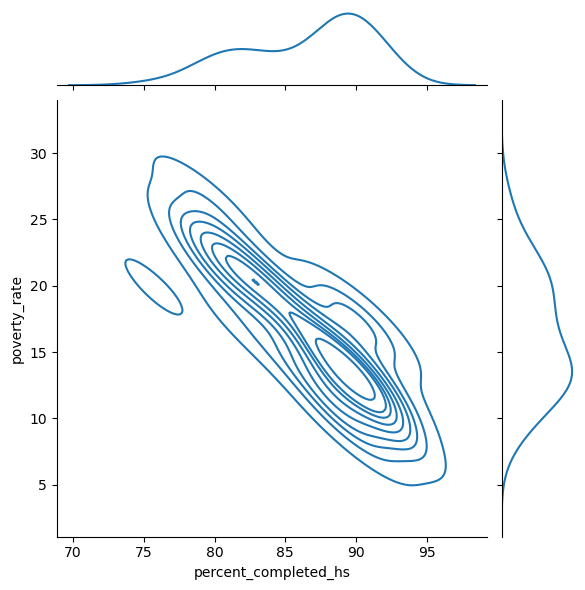

In [93]:
sns.jointplot(data=states_poverty_v_hs_compl, x="percent_completed_hs", y="poverty_rate", kind="kde")

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

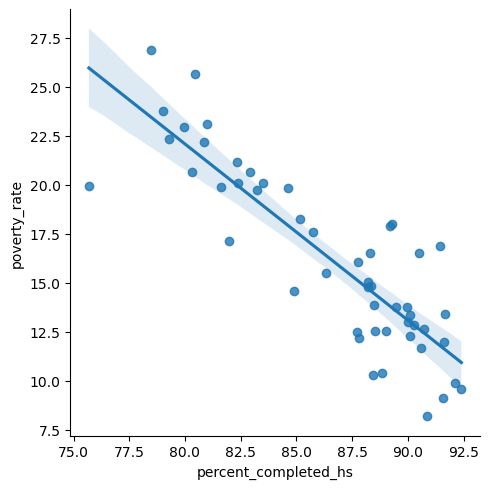

In [94]:
sns.lmplot(data=states_poverty_v_hs_compl, x="percent_completed_hs", y="poverty_rate")

<Axes: xlabel='percent_completed_hs', ylabel='poverty_rate'>

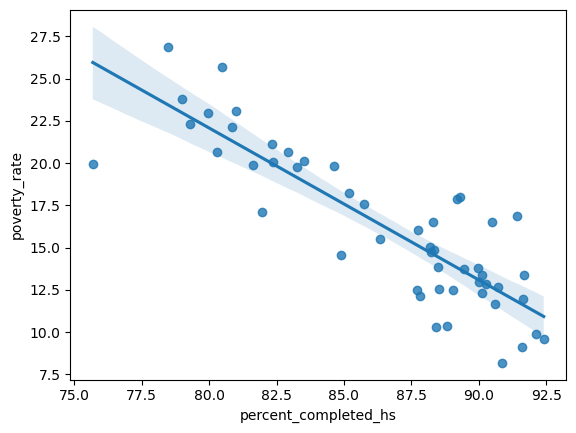

In [95]:
sns.regplot(data=states_poverty_v_hs_compl, x="percent_completed_hs", y="poverty_rate")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [111]:
df_share_race_city.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [128]:
df_share_race_city
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')

states_race_share = df_share_race_city.groupby('Geographic area').agg({'share_white': pd.Series.mean, 'share_black': pd.Series.mean, 'share_native_american': pd.Series.mean, 'share_asian': pd.Series.mean, 'share_hispanic': pd.Series.mean})

# Divide 100 by the sum of columns for each row
row_sums = states_race_share.sum(axis=1)
row_sums
ratios = 100 / row_sums
ratios

# Multiply each column value by the corresponding ratio to get normalized data
normalized_states_race_share = states_race_share.mul(ratios, axis=0)
normalized_states_race_share


,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,47.74,0.59,47.97,1.45,2.25
AL,72.54,23.33,0.66,0.48,2.98
AR,78.25,16.26,0.76,0.48,4.26
AZ,54.31,0.87,25.91,0.66,18.26
CA,64.45,2.41,1.55,4.99,26.59
CO,80.25,0.84,1.49,1.06,16.37
CT,83.83,4.86,0.64,2.91,7.76
DC,37.71,49.66,0.29,3.43,8.91
DE,75.06,15.15,0.52,1.97,7.30


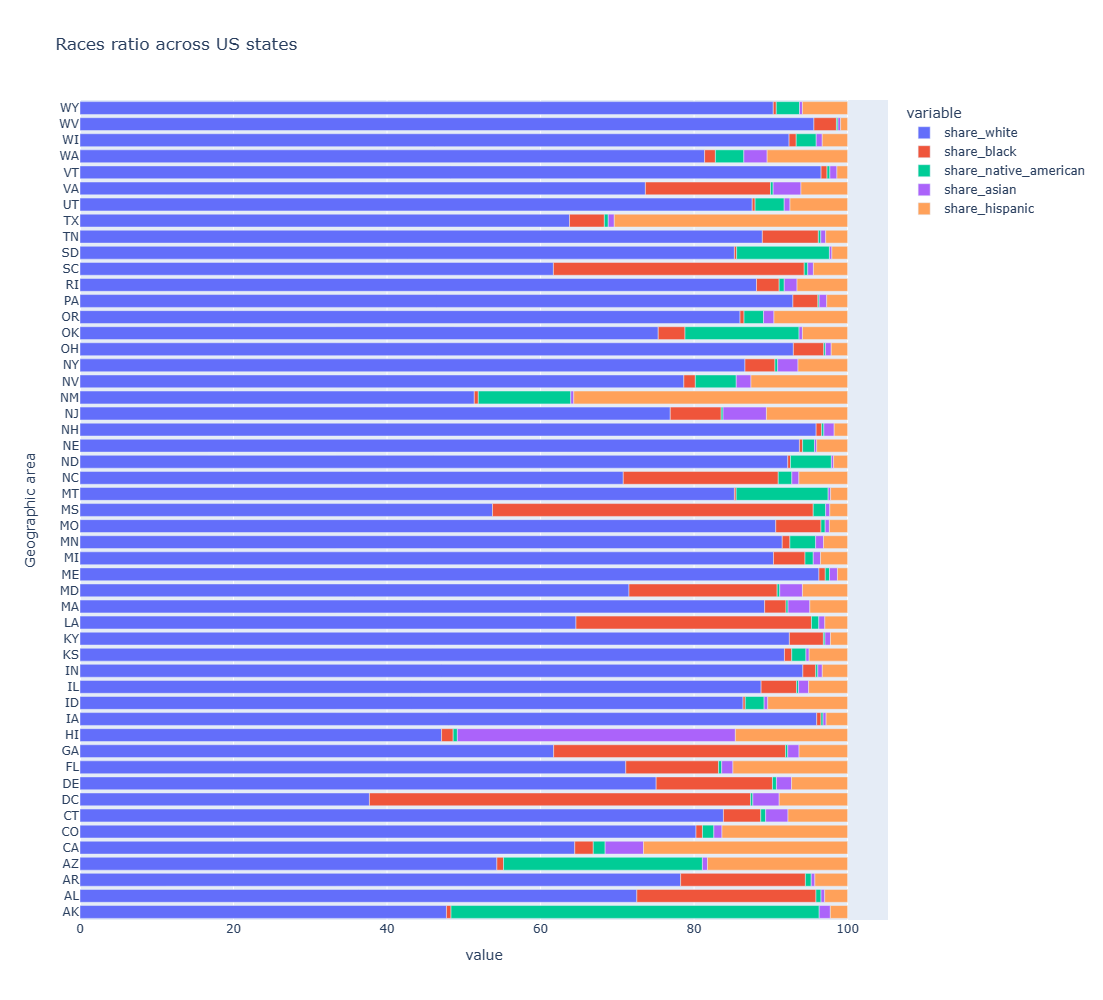

In [136]:
fig = px.bar(normalized_states_race_share, 
             x=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"],
             orientation='h',
             height = 1000,
             title="Races ratio across US states"
            )


fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [145]:
fatalities_by_race = df_fatalities['race'].replace(
    {
        'W':'White',
        'B':'Black',
        'H':'Hispanic',
        'A':'Asian',
        'N':'Native American',
        'O':'Other'
    }
)

fatalities_by_race = fatalities_by_race.value_counts()

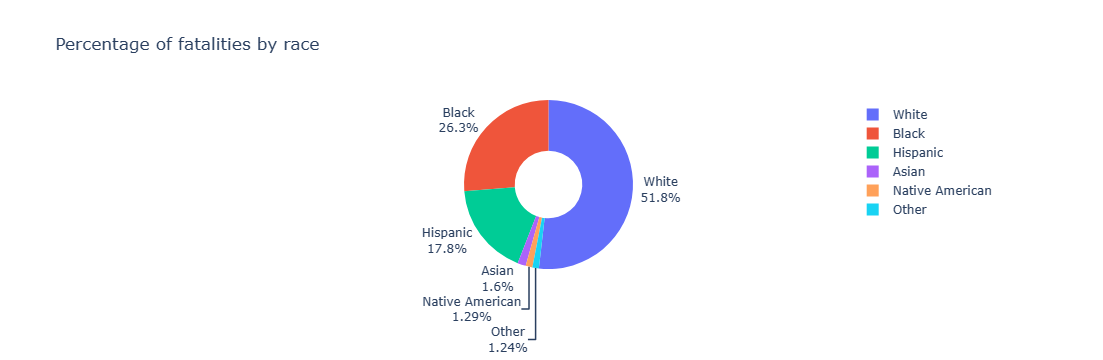

In [151]:
fig = px.pie(labels=fatalities_by_race.index,
             values=fatalities_by_race.values,
             title="Percentage of fatalities by race",
             names=fatalities_by_race.index,
             hole=0.4
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [152]:
fatalities_by_gender = df_fatalities['gender'].replace(
    {
        'F':'Female',
        'M':'Male'
    }
)

fatalities_by_gender = fatalities_by_gender.value_counts()

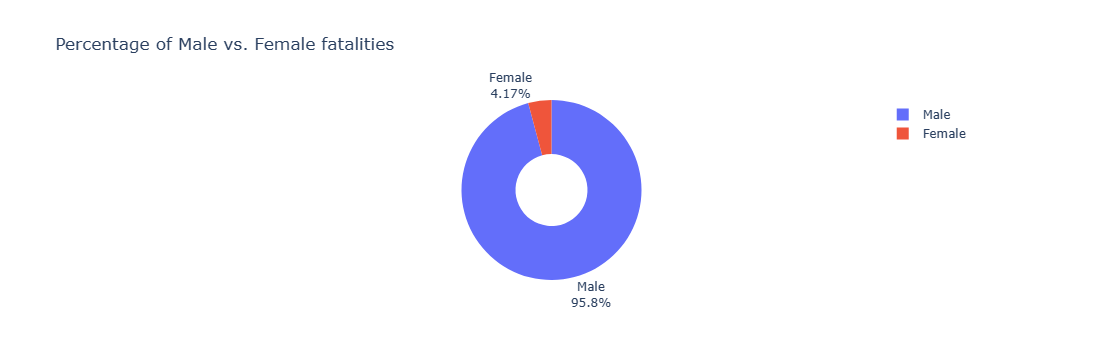

In [153]:
fig = px.pie(labels=fatalities_by_gender.index,
             values=fatalities_by_gender.values,
             title="Percentage of Male vs. Female fatalities",
             names=fatalities_by_gender.index,
             hole=0.4
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [163]:
df_fatalities.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
941,1085,Calvin McKinnis,14/12/15,shot,gun,33.00,M,Black,New Orleans,LA,False,attack,Not fleeing,True
1465,1660,Miguel Angel Chavez-Angles,24/06/16,shot,gun,42.00,M,H,Oklahoma City,OK,True,other,Other,False
822,968,Tony Berry,30/10/15,shot,gun,25.00,M,Black,Houston,TX,False,other,Foot,False
1459,1648,Jay Anderson,23/06/16,shot,gun,25.00,M,Black,Wauwatosa,WI,False,other,Not fleeing,True
1695,1899,Charles Dove,20/09/16,shot,gun,35.00,M,White,Decatur County,TN,False,other,Car,True


In [164]:
fatalities_by_manner = df_fatalities[['manner_of_death', 'age', 'gender']]

fatalities_by_manner['gender'].replace(
    {
        'F':'Female',
        'M':'Male'
    },
    inplace=True    
)
fatalities_by_manner

C:\Users\james\AppData\Local\Temp\ipykernel_8640\591625663.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,manner_of_death,age,gender
0,shot,53.00,Male
1,shot,47.00,Male
2,shot and Tasered,23.00,Male
3,shot,32.00,Male
4,shot,39.00,Male
...,...,...,...
2519,shot,16.00,Male
2523,shot,25.00,Male
2525,shot,39.00,Male
2533,shot,28.00,Male


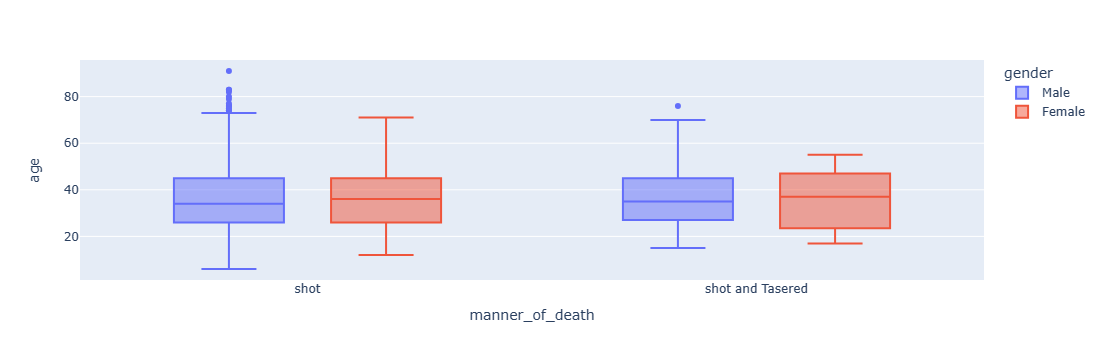

In [162]:
fig = px.box(fatalities_by_manner, x="manner_of_death", y="age", color="gender")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [181]:
df_fatalities['armed'].unique()

array(['attack', 'other', 'undetermined'], dtype=object)

In [175]:
fatalities_vs_armed = df_fatalities[['armed']]
fatalities_vs_armed['armed'] = fatalities_vs_armed['armed'].replace(['unarmed', 'undetermined'], ['Unarmed', 'Undetermined'])
fatalities_vs_armed['armed'] = fatalities_vs_armed['armed'].replace([val for val in fatalities_vs_armed['armed'].unique() if val not in ['Unarmed', 'Undetermined']], 'Armed')

fatalities_vs_armed = fatalities_vs_armed['armed'].value_counts()
fatalities_vs_armed

C:\Users\james\AppData\Local\Temp\ipykernel_8640\3774539380.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\james\AppData\Local\Temp\ipykernel_8640\3774539380.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



armed
Armed           1997
Unarmed          165
Undetermined      92
Name: count, dtype: int64

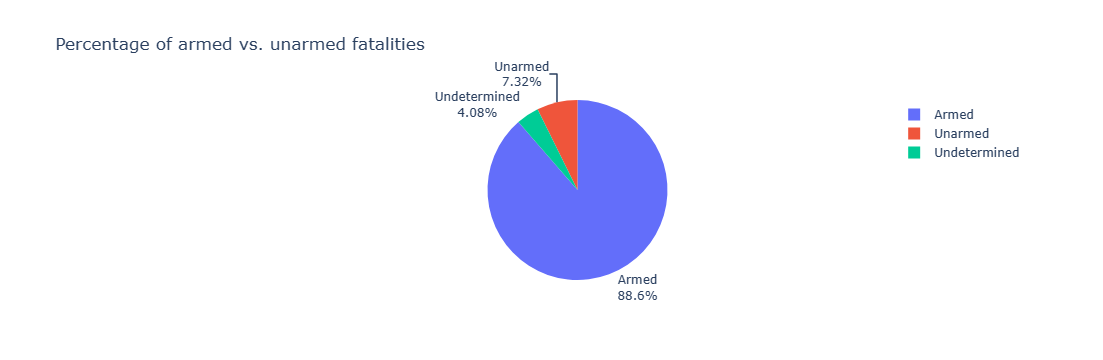

In [176]:
fig = px.pie(labels=fatalities_vs_armed.index,
             values=fatalities_vs_armed.values,
             title="Percentage of armed vs. unarmed fatalities",
             names=fatalities_vs_armed.index
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

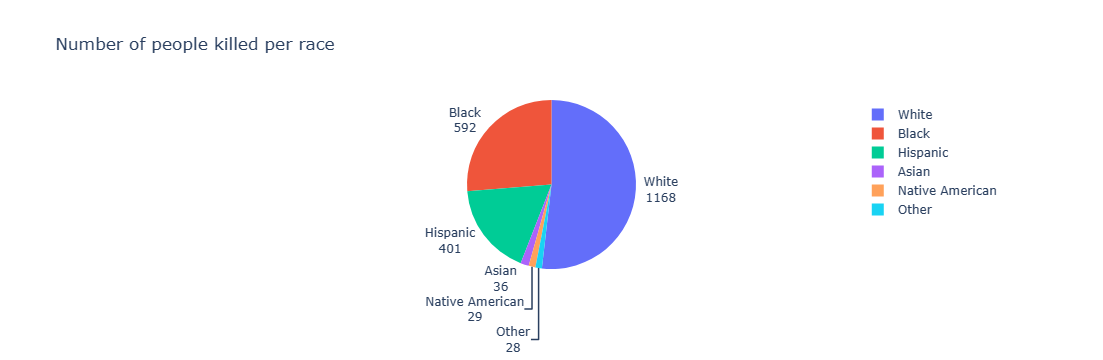

In [184]:
fig = px.pie(labels=fatalities_by_race.index,
             values=fatalities_by_race.values,
             title="Number of people killed per race",
             names=fatalities_by_race.index
)
fig.update_traces(textposition='outside', textinfo='value+label')
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [179]:
fatalities_vs_mental_health = df_fatalities['signs_of_mental_illness'].value_counts()

signs_of_mental_illness
False    1681
True      573
Name: count, dtype: int64

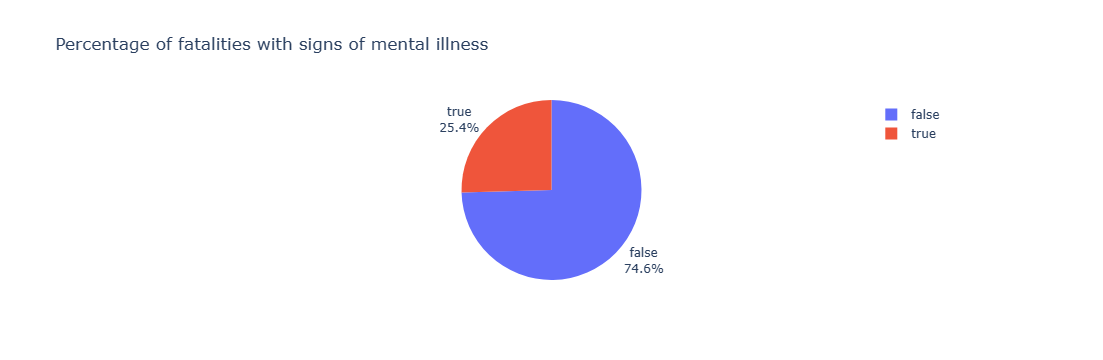

In [180]:
fig = px.pie(labels=fatalities_vs_mental_health.index,
             values=fatalities_vs_mental_health.values,
             title="Percentage of fatalities with signs of mental illness",
             names=fatalities_vs_mental_health.index
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [196]:
fatalities_by_cities = df_fatalities['city'].value_counts()
top10_cities = fatalities_by_cities.nlargest(10, keep='all')
print('Top 10 most dangerous cities (by total number of fatalities:')
print(top10_cities)

Top 10 most dangerous cities (by total number of fatalities:
city
Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
Miami           15
San Antonio     15
Indianapolis    14
St. Louis       14
Name: count, dtype: int64


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [213]:

# top_10_cities_race = df_share_race_city[df_share_race_city['City'].isin(top10_cities.index)]
# top_10_cities_race
# # df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(float)
# # states_hs_commpletion_rate = df_pct_completed_hs.groupby('Geographic Area').agg({'percent_completed_hs': pd.Series.mean})

# # df_share_race_city
# # df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')

# # states_race_share = df_share_race_city.groupby('Geographic area').agg({'share_white': pd.Series.mean, 'share_black': pd.Series.mean, 'share_native_american': pd.Series.mean, 'share_asian': pd.Series.mean, 'share_hispanic': pd.Series.mean})

# # # Divide 100 by the sum of columns for each row
# # row_sums = states_race_share.sum(axis=1)
# # row_sums
# # ratios = 100 / row_sums
# # ratios

# # # Multiply each column value by the corresponding ratio to get normalized data
# # normalized_states_race_share = states_race_share.mul(ratios, axis=0)
# # normalized_states_race_share

# # fatalities_by_race = df_fatalities['race'].replace(
# #     {
# #         'W':'White',
# #         'B':'Black',
# #         'H':'Hispanic',
# #         'A':'Asian',
# #         'N':'Native American',
# #         'O':'Other'
# #     }
# # )

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).